# Porque Mancala de quatro valetas?

O mancala comum, por ter 12 valetas e 48 sementes (quatro por valeta no início), simplesmente tem cenários demais e precisaria de muito tempo de execução para pegar uma base de cenários significativa. Então, foi sugerido pelo professor a criação de um mancala com apenas quatro valeta, sendo duas para cada jogador, e oito sementes (dois por valeta no início do jogo). Vamos aplicar os dois métodos de inteligência para ver se conseguimos resultados melhores.

# Criando uma representação gráfica

Primeiro, vamos criar uma representação gráfica para visualizarmos como o mancala de quatro valetas seria.

In [ ]:
## Bibliotecas que necessitamos
from PIL import Image, ImageDraw, ImageFont
def limpaTabuleiro(board =Image.new('RGB', (415, 300),  "gray") ):
  ## Criamos uma espécie de canvas para desenhar
  draw  = ImageDraw.Draw(board)

  ##Criamos o retângulo onde de fato será o tabuleiro
  w, h = 415, 300
  shape = [(20,20),(w-20,h-20)]
  draw.rectangle(shape, fill="#c98255",outline="black")

  ## Desenhando as mancalas
  ## Esquerda
  shape = [(30,30),(110,200)]
  draw.rectangle(shape, fill="#613e29",outline="#875739")
  shape = [(35,35),(105,195)]
  draw.rectangle(shape, fill="#7d5034",outline="#875739")

  ## Direita
  shape = [(300,100),(380,270)]
  draw.rectangle(shape, fill="#613e29",outline="#875739")
  shape = [(305,105),(375,265)]
  draw.rectangle(shape, fill="#7d5034",outline="#875739")


  ##Desenhando as casas de cima
  draw.ellipse((130, 45, 200,115),fill="#613e29", outline="#875739" ) 
  draw.ellipse((210, 45, 280,115),fill="#613e29", outline="#875739" )

  ##Desenhando as casas de baixo
  draw.ellipse((130, 180, 200,250),fill="#613e29", outline="#875739" ) 
  draw.ellipse((210, 180, 280,250),fill="#613e29", outline="#875739" )

  ##Desenhando em cima dos numeros das casas
  ##Você não verá nehuma mudança, mas ela sobrepõe os numeros 
  draw.rectangle((150,118,180,178), fill="#c98255")
  draw.rectangle((230,118,260,178), fill="#c98255")

  draw.rectangle((310,245,370,260),fill="#7d5034")
  draw.rectangle((55,37,85,55),fill="#7d5034")
  
  ##Veremos isso adiante, mas caso queira entender o codigo abaixo comentado
  ##serve para mostrar a quantidade de sementes em sua respectiva casa
  
  ##Quantidade de pedras em cima
  ## draw.text((162,122), "%d"%0, fill="black") -> esquerda
  ## draw.text((242,122), "%d"%0, fill="black") -> direita

  ##Quantidade de pedras em baixo
  ## draw.text((162,165), "%d"%0, fill="black") -> esquerda
  ## draw.text((242,165), "%d"%0, fill="black") -> direita

  ##Quantidade de pedras da mancala a direita
  ## draw.text((300,250), "%d"%0, fill="white")
  ##Quantidade de pedras da mancala a esquerda
  ## draw.text((65,40), "%d"%0, fill="white")

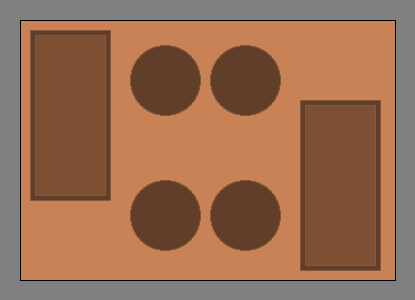

In [ ]:
board =Image.new('RGB', (415, 300),  "gray")
limpaTabuleiro(board)
display(board)

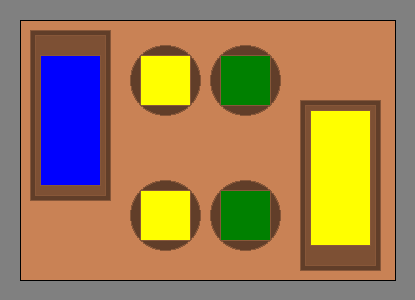

In [ ]:
##Area circulo de cima                                      ## Apenas uma identificação para pegar uma coordenada aleatória dentro do respectivo quadrado
limpaTabuleiro(board)
draw  = ImageDraw.Draw(board)

draw.rectangle((140, 55, 190,105), fill="yellow",outline="#875739") ## PontoInicial(x1 = 140~170, y1 = 55~85),pontoFinal(x2 = x1+20, y2 = y2+20)

draw.rectangle((220, 55, 270,105), fill="green",outline="#875739") ## PontoInicial(x1 = 220~250, y1 = 55~85),pontoFinal(x2 = x1+20, y2 = y2+20)

##Area circulo de baixo
draw.rectangle((140, 190, 190,240), fill="yellow",outline="#875739") ## PontoInicial(x1 = 140~170, y1 = 190~220),pontoFinal(x2 = x1+20, y2 = y2+20) 

draw.rectangle((220, 190, 270,240), fill="green",outline="#875739") ## PontoInicial(x1 = 220~250, y1 = 190~220),pontoFinal(x2 = x1+20, y2 = y2+20)

#Mancala Esquerda
draw.rectangle((40, 55, 100,185), fill="blue",outline="#875739") ## PontoInicial(x1 = 40~70, y1 = 55~165),pontoFinal(x2 = x1+20, y2 = y2+20)

##Mancala Direita
draw.rectangle((310, 110, 370,245), fill="yellow",outline="#875739") ## PontoInicial(x1 = 310~340, y1 = 110~220),pontoFinal(x2 = x1+20, y2 = y2+20)

##draw.ellipse((150, 185, 170,205), fill="green" ,outline = "black") ##20e20  

display(board)

In [ ]:
import random
from random import randrange

def draw_board(tab) :
  limpaTabuleiro(board)
  ltab = list(tab)
  colors = ["#ff2121","#ffcf21","#64ff21","#21ffda","#2151ff","#a221ff","#ff21cf"]

  ##valoresY1 = cima -> 55,85 | baixo -> 190,220
  draw.text((162,122), "%d"%ltab[4], fill="black") 
  draw.text((242,122), "%d"%ltab[3], fill="black")

  ##Quantidade de pedras em baixo
  draw.text((162,165), "%d"%ltab[0], fill="black") 
  draw.text((242,165), "%d"%ltab[1], fill="black")

  ##Quantidade de pedras da mancala a direita
  draw.text((340,250), "%d"%ltab[2], fill="white")
  ##Quantidade de pedras da mancala a esquerda
  draw.text((65,40), "%d"%ltab[5], fill="white")

  for i in range(6):
    for x in range(ltab[i]):
      ## Dicionario para cada posição do tabuleiro escolher uma coordenada x aleatorio
      valoresX1 = {'0':randrange(140,170), '1':randrange(220,250),'2':randrange(310,340),'3':randrange(220,250),'4':randrange(140,170),'5':randrange(40,70)}
      if(i<2):
        y1 = randrange(190,220)
        draw.ellipse((valoresX1["%d"%i],y1 , valoresX1["%d"%i]+20,y1+20),fill=random.choice(colors), outline="black" )

      elif(i>2 and i<5):
        y1 = randrange(55,85)
        draw.ellipse((valoresX1["%d"%i], y1, valoresX1["%d"%i]+20,y1+20),fill=random.choice(colors), outline="black" )

      elif(i == 2):
        y1 = randrange(110,220)
        y2 = y1 + 20
        draw.ellipse((valoresX1["%d"%i], y1, valoresX1["%d"%i]+20,y2),fill=random.choice(colors), outline="black" )

      elif(i == 5):
        y1 = randrange(55,165)
        y2 = y1 + 20
        draw.ellipse((valoresX1["%d"%i], y1, valoresX1["%d"%i]+20,y2),fill=random.choice(colors), outline="black" )
  return display(board)

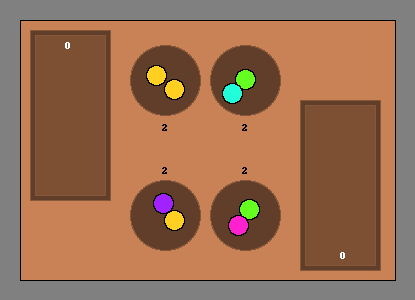

In [ ]:
tab = (2,2,0,2,2,0) ##experimente colocando valores aleatorios
draw_board(tab)

# Aplicando a lógica de jogo

Nesta seção nós transformação a implementação da lógica de jogo implementada anteriormente para caber ao mancala de duas valetas.

In [ ]:
## Define condições de vitória

def winner(tab):
  soma1 = [tab[0]+tab[1]+tab[2]]
  soma2 = [tab[3]+tab[4]+tab[5]]
  #verifica se não há mais pedras em todas as casas do jogador
  verificaPecas1 = [tab[0]+tab[1]]
  verificaPecas2 = [tab[3]+tab[4]]

  if (verificaPecas1 == [0])  or (verificaPecas2 == [0]):
    if soma1 > soma2:
      return 1
    elif soma2 > soma1:
      return -1
    else:
      return 0
  else:
    return 0


In [ ]:
## Define movimentos válidos

def get_valid_moves(tab, turn):
  valids = []
  if turn == 1:
    for i in range (len(tab)-4):
      if tab[i] > 0:
        valids.append(i)
    return valids

  if turn == -1:
    for i in range (3, len(tab)-1):
      if tab[i] > 0:
        valids.append(i)
    return valids

In [ ]:
import random
def player(tab, turn) :
    valid_moves = get_valid_moves(tab,turn)
    if valid_moves :
        return (turn, random.choice(valid_moves) )

In [ ]:
## Abaixo uma função que gerencia um jogo. 
def game(player1, player2) :
    ## Inicialização
    turn   = 1
    tab    = (2,2,0,2,2,0) 
    opostoplayer1 = {0:4, 1:3}
    opostoplayer2 = {4:0, 3:1}
    aux = 0
    result = 0 

    ## Lista que guardará o histórico
    history = [] 

    ## Enquanto houverem jogadas, pedimos para o jogador vez prosseguir
    while get_valid_moves(tab,turn) :
        _, pos = None, None
        ## Pedindo uma jogada ao jogador da vez.
        if turn == 1 :
          ltab = list(tab)
          _, pos = player1(tab, turn) 
          qtd = tab[pos]
          ltab[pos] = 0
          for i in range(qtd):
            pos+=1
            ##verifica a posicao para não colocar a pedra na mancala adversaria
            if len(tab)-1 != pos:
              ##Colocando peças no tabuleiro
              ltab[pos] += 1
              tab = tuple(ltab)

            else:
              ##Colocando peças no tabuleiro
              pos = 0
              ltab[pos] +=1
              tab = tuple(ltab)
              ## Zera o valor da posição escolhida
              ltab = list(tab)
              ltab[pos] = 0

          ## Verifica se a ultima pedra semeada foi em uma casa vazia
          ##ltab = list(tab)
          if tab[pos] == 1 and pos < 2 :
            aux = opostoplayer1[pos]
            if ltab[aux] != 0 :
              ltab[pos] = 0
              ltab[2] += ltab[aux]+1
              ltab[aux] = 0
              tab = tuple(ltab)

          ## Verifica se a ultima pedra semeada foi colocada na mancala 
          ## fazendo com que o jogador jogue novamente
          if pos == 2:
            turn = -turn
          
        else : 
          ltab = list(tab)
          _, pos = player2(tab, turn)
          qtd = tab[pos]
          ltab = list(tab)
          ltab[pos] = 0

          for i in range(qtd):
            pos+=1
            if (pos != 2) and (pos <= 5):
              ##Colocando peças no tabuleiro
              ltab[pos]+=1
              tab = tuple(ltab)
            elif pos == 6:
              ##Colocando peças no tabuleiro
              pos = 0
              ltab[pos] +=1
              tab = tuple(ltab)
            if pos == 2:
              ##Colocando peças no tabuleiro
              pos+=1
              ltab[pos]+=1
              tab = tuple(ltab) 

          ## Verifica se a ultima pedra semeada foi em uma casa vazia
          ##ltab = list(tab)
          if ltab[pos] == 1 and pos >= 3 and pos != 5  :
            aux = opostoplayer2[pos]
            if ltab[aux] != 0:
              ltab[pos] = 0
              ltab[5] += ltab[aux]+1
              ltab[aux] = 0
              tab = tuple(ltab)

          ## Verifica se a ultima pedra semeada foi colocada na mancala 
          ## fazendo com que o jogador jogue novamente   
          if pos == 5:
            turn = -turn
        
        ## Adicionando tabuleiro no histórico
        history.append(tab)

        ## Verificando se alguém ganhou
        result = winner(tab)
        if result :
            break

        ## Trocando a vez de jogar
        turn = -turn
    
    return result, history

# Testando o jogo

Aplicada a lógica, vamos tentar umas partidas de mancala de quatro valetas.

In [ ]:
## Iniciando uma partida
result, history = game(player, player)
print(result)
print(history)

1
[(2, 0, 1, 3, 2, 0), (3, 0, 1, 3, 0, 1), (0, 1, 2, 4, 0, 1), (1, 2, 2, 0, 1, 2), (0, 3, 2, 0, 1, 2), (0, 3, 2, 0, 0, 3)]


In [ ]:
def campeonato(player1, player2, num_games = 1000) :
    results = [0,0,0]
    for i in range(num_games) :
        result, _ = game(player1, player2)
        results[result] += 1
    return tuple(results)

In [ ]:
draw, p1, p2 = campeonato(player, player)
print("Draw = %i, P1 = %i, P2 = %i" % (draw, p1, p2))

Draw = 54, P1 = 190, P2 = 756


# Gerando inteligência simples

Vemos aqui mais uma vez que o player 2 tem a vantagem no mancala. Vamos ver se conseguimos mudar este resultado implementando a mesma "inteligência simples" utilizada no mancala comum.

In [ ]:
def campeonato_com_knowledge(player1, player2, num_games = 100000, knowledge = {}):
  results = [0,0,0]

  for i in range(num_games):
    result, history = game(player1, player2)
    results[result] += 1

    for tab in history:
      if not tab in knowledge:
        knowledge[tab] = [0,0,0]
      knowledge[tab][result] += 1

  return tuple(results), knowledge

In [ ]:
results, knowledge = campeonato_com_knowledge(player, player, num_games = 100000)
print(results)

(6336, 18909, 74755)


In [ ]:
def create_player(knowledge):
  def player(tab,turn):
    valid_moves = get_valid_moves(tab,turn)

    scores = []
    opostoplayer1 = {0:4, 1:3}
    opostoplayer2 = {4:0, 3:1}
    aux = 0
    for pos in valid_moves:
      ltab = list(tab)

      if turn == 1 :
        qtd = ltab[pos]
        ltab[pos] = 0

        for i in range(qtd):
          pos+=1
          ##verifica a posicao para não colocar a pedra na mancala adversaria
          if len(ltab)-1 != pos:
            ##Colocando peças no tabuleiro
            ltab[pos] += 1

          else:
            ##Colocando peças no tabuleiro
            pos = 0
            ltab[pos] +=1

          ## Verifica se a ultima pedra semeada foi em uma casa vazia
          ##ltab = list(tab)
        if ltab[pos] == 1 and pos < 2 :
          aux = opostoplayer1[pos]
          if ltab[aux] != 0 :
            ltab[pos] = 0
            ltab[2] += ltab[aux]+1
            ltab[aux] = 0
          
      else : 
        qtd = tab[pos]
        ltab[pos] = 0

        for i in range(qtd):
          pos+=1
          if (pos != 2) and (pos <= 5):
            ##Colocando peças no tabuleiro
            ltab[pos]+=1
          elif pos == 6:
            ##Colocando peças no tabuleiro
            pos = 0
            ltab[pos] +=1
          if pos == 2:
            ##Colocando peças no tabuleiro
            pos+=1
            ltab[pos]+=1

          ## Verifica se a ultima pedra semeada foi em uma casa vazia
          ##ltab = list(tab)
        if ltab[pos] == 1 and pos >= 3 and pos != 5  :
          aux = opostoplayer2[pos]
          if ltab[aux] != 0:
            ltab[pos] = 0
            ltab[5] += ltab[aux]+1
            ltab[aux] = 0
        
      a,b,c = knowledge.get(tuple(ltab),(1,0,0))
      scores.append(turn*(b-c)/(a+b+c))
    
    chosen = valid_moves[scores.index(max(scores))]
    return turn, chosen
  return player

In [ ]:
player_knowledge = create_player(knowledge)
draw, p1, p2 = campeonato(player_knowledge, player)
print("Draw = %i, Knowledge = %i, Aleatorio = %i" % (draw, p1, p2))
draw, p1, p2 = campeonato(player, player_knowledge)
print("Draw = %i, Aleatorio = %i, Knowledge = %i" % (draw, p1, p2))

Draw = 243, Knowledge = 481, Aleatorio = 276
Draw = 0, Aleatorio = 0, Knowledge = 1000


Podemos chegar à conclusão que, no mancala de quatro valetas, pode-se pegar um conjuntos de cenários significativo o suficiente para gerar um resultado bem melhor do que no mancala comum, tomando em conta o mesmo número de iterações do programa.

# Gerando inteligência por Monte Carlo

Agora aplicaremos o Monte Carlo novamente, da mesma maneira que no mancala comum, porém com a lógica de jogo do mancala de quatro valetas.

In [ ]:
def generate_rl_player(state_values, epsilon) :
  def player(tab, turn) :
    valid_moves = get_valid_moves(tab,turn)

    epsilon_random = random.random()
    if epsilon_random < epsilon :        
      return turn, random.choice(valid_moves)
    else :       
      ## A nossa política será fazer o movimento de acordo com os state_values.
      ## Escolheremos um dos melhores movimentos. Se turn = 1, significa maximizar 
      ## os state_values, caso contrário seria minimizar.
      scores = []
      opostoplayer1 = {0:4, 1:3}
      opostoplayer2 = {4:0, 3:1}
      aux = 0
      for move in valid_moves :
        pos = move
        next_state = list(tab)

        if turn == 1 :
          qtd = next_state[pos]
          next_state[pos] = 0

          for i in range(qtd):
            pos+=1
            ##verifica a posicao para não colocar a pedra na mancala adversaria
            if len(next_state)-1 != pos:
              ##Colocando peças no tabuleiro
              next_state[pos] += 1

            else:
              ##Colocando peças no tabuleiro
              pos = 0
              next_state[pos] +=1

          ## Verifica se a ultima pedra semeada foi em uma casa vazia
          ##ltab = list(tab)
          if next_state[pos] == 1 and pos < 2 :
            aux = opostoplayer1[pos]
            if next_state[aux] != 0 :
              next_state[pos] = 0
              next_state[2] += next_state[aux]+1
              next_state[aux] = 0
          
        else : 
          qtd = next_state[pos]
          next_state[pos] = 0

          for i in range(qtd):
            pos+=1
            if (pos != 2) and (pos <= 5):
              ##Colocando peças no tabuleiro
              next_state[pos]+=1
            elif pos == 6:
              ##Colocando peças no tabuleiro
              pos = 0
              next_state[pos] +=1
            if pos == 2:
              ##Colocando peças no tabuleiro
              pos+=1
              next_state[pos]+=1

          ## Verifica se a ultima pedra semeada foi em uma casa vazia
          ##ltab = list(tab)
          if next_state[pos] == 1 and pos >= 3 and pos != 5  :
            aux = opostoplayer2[pos]
            if next_state[aux] != 0:
              next_state[pos] = 0
              next_state[5] += next_state[aux]+1
              next_state[aux] = 0

        ## Vejam que estamos inicializando com zero.
        scores.append(state_values.get(tuple(next_state), 0))
      
      ## Analisando qual o best score de um tabuleiro.

      best_score = None
      if (turn == 1) :
        best_score = max(scores)
      else :
        best_score = min(scores)
          

      ## Selecionando quais as jogadas de melhor score. Em caso de empate,
      ## escolheremos ao acaso.
      best_moves = []
      for i in range(len(scores)) :  
        if scores[i] == best_score :
          best_moves.append(valid_moves[i])
          
      ## retornando um dos melhores movimentos
      return turn, random.choice(best_moves)
  return player

In [ ]:
def rewards(tab) :
  return winner(tab)

In [ ]:
def update_state_values_monte_carlo(values, rewards, amostra, gamma = 0.9, alpha = 0.1) :
    ## Definiremos o último state_value como zero para iniciar o processo iterativo.
    discounted_return = 0
    next_state        = amostra[-1]

    ## Observe o uso de "reversed" estamos iterando de trás pra frente.
    for state in reversed(amostra[:-1]) :
        ## Abaixo simplesmente computamos o retorno a longo prazo e somamos com a recompensa imediata
        discounted_return = gamma*discounted_return + rewards(next_state)

        ## Abaixo a fórmula para atualização dos state-values. Isso substitui o valor esperado (média).
        ## Note que estamos inicializando os state_values com zero
        values[state] = values.get(state,0) + alpha*(discounted_return - values.get(state, 0))
        next_state = state

    return state_values

In [ ]:

gamma  = 0.999
alpha  = 0.1
state_values = {}
player_rl = generate_rl_player(state_values, 1)

ITERACOES = 100000
for i in range(ITERACOES) :
  random_prob = max(0.01, (ITERACOES - i)/ITERACOES)  

  _, amostra = game(player_rl, player_rl)
  state_values = update_state_values_monte_carlo(state_values, rewards, amostra, gamma, alpha)
  player_rl = generate_rl_player(state_values, random_prob) 

player_rl = generate_rl_player(state_values, 0)  

In [ ]:
results = campeonato(player, player_rl)
print("Draw = %i, Acaso = %i, RL = %i" % results)

results = campeonato(player_rl, player)
print("Draw = %i, RL = %i, Acaso = %i" % results)

Draw = 0, Acaso = 0, RL = 1000
Draw = 275, RL = 490, Acaso = 235


Os dois métodos geram resultados muitos melhores no mancala de quatro valetas e, portanto, podemos chegar à conclusão que o mancala comum realmente tem cenários demais para conseguirmos resultados
satisfatórios com base no escopo desta atividade.